In [7]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [8]:
#  Import and read the charity_data.csv. 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [9]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [10]:
type_count_df = application_df['APPLICATION_TYPE'].value_counts()
type_count_df

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count_df[type_count_df<250].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
classification_count_df = application_df['CLASSIFICATION'].value_counts()
classification_count_df

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2600        1
C8210        1
C2170        1
C1820        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_count_df[classification_count_df < 1000].index)
# Replace in dataframe
for app in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [15]:
#drop features where nearly all rows are the same
application_df = application_df.drop(columns = ['STATUS', 'SPECIAL_CONSIDERATIONS'])

In [16]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [17]:
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [18]:
# Merge one-hot encoded features and drop the originals
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,741
Trainable params: 5,741
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [25]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 906us/step - loss: 65742.0391 - accuracy: 0.4946
Epoch 2/100
804/804 [==============================] - 1s 806us/step - loss: 102635.8047 - accuracy: 0.5061
Epoch 3/100
804/804 [==============================] - 1s 862us/step - loss: 22027.0059 - accuracy: 0.5063
Epoch 4/100
804/804 [==============================] - 1s 821us/step - loss: 37333.1367 - accuracy: 0.4894
Epoch 5/100
804/804 [==============================] - 1s 772us/step - loss: 18809.5195 - accuracy: 0.5035
Epoch 6/100
804/804 [==============================] - 1s 826us/step - loss: 57769.3008 - accuracy: 0.5072
Epoch 7/100
804/804 [==============================] - 1s 796us/step - loss: 32017.5352 - accuracy: 0.4993
Epoch 8/100
804/804 [==============================] - 1s 788us/step - loss: 6775.2456 - accuracy: 0.5113
Epoch 9/100
804/804 [==============================] - 1s 800us/step - loss: 25243.3242 - accuracy: 0.5052
Epoch 10/100
804/804 [===============

804/804 [==============================] - 1s 783us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 80/100
804/804 [==============================] - 1s 779us/step - loss: 0.6913 - accuracy: 0.5321
Epoch 81/100
804/804 [==============================] - 1s 745us/step - loss: 0.6913 - accuracy: 0.5321
Epoch 82/100
804/804 [==============================] - 1s 742us/step - loss: 0.6913 - accuracy: 0.5321
Epoch 83/100
804/804 [==============================] - 1s 736us/step - loss: 0.6913 - accuracy: 0.5321
Epoch 84/100
804/804 [==============================] - 1s 799us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 85/100
804/804 [==============================] - 1s 781us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 86/100
804/804 [==============================] - 1s 787us/step - loss: 0.6913 - accuracy: 0.5321
Epoch 87/100
804/804 [==============================] - 1s 804us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 88/100
804/804 [==============================] - 1s 796us/step - loss:

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6192 - accuracy: 0.6989
Loss: 0.6192001700401306, Accuracy: 0.6988921165466309


In [27]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Trial 3, keep 'status'

In [28]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity2.h5")

In [29]:
#repeat with 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [30]:
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [31]:
type_count_df = application_df['APPLICATION_TYPE'].value_counts()

In [32]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count_df[type_count_df<250].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [33]:
classification_count_df = application_df['CLASSIFICATION'].value_counts()

In [34]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_count_df[classification_count_df < 1000].index)
# Replace in dataframe
for app in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [35]:
#drop features where nearly all rows are the same
application_df = application_df.drop(columns = ['SPECIAL_CONSIDERATIONS'])

In [36]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [37]:
# Merge one-hot encoded features and drop the originals
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3360      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [44]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 802us/step - loss: 84116.5391 - accuracy: 0.4867
Epoch 2/100
804/804 [==============================] - 1s 914us/step - loss: 73747.5391 - accuracy: 0.4917
Epoch 3/100
804/804 [==============================] - 1s 908us/step - loss: 57448.0742 - accuracy: 0.5017
Epoch 4/100
804/804 [==============================] - 1s 813us/step - loss: 13757.0977 - accuracy: 0.5092
Epoch 5/100
804/804 [==============================] - 1s 784us/step - loss: 28423.3477 - accuracy: 0.5031
Epoch 6/100
804/804 [==============================] - 1s 921us/step - loss: 30914.3066 - accuracy: 0.5070
Epoch 7/100
804/804 [==============================] - 1s 757us/step - loss: 16880.6387 - accuracy: 0.4950
Epoch 8/100
804/804 [==============================] - 1s 750us/step - loss: 24840.9922 - accuracy: 0.5037
Epoch 9/100
804/804 [==============================] - 1s 910us/step - loss: 14978.8105 - accuracy: 0.5079
Epoch 10/100
804/804 [===============

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.9949 - accuracy: 0.5222
Loss: 0.9949136972427368, Accuracy: 0.522215723991394


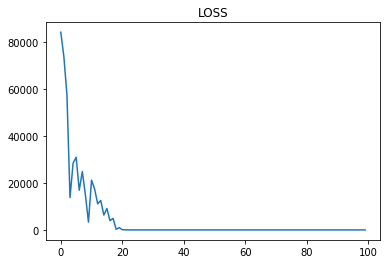

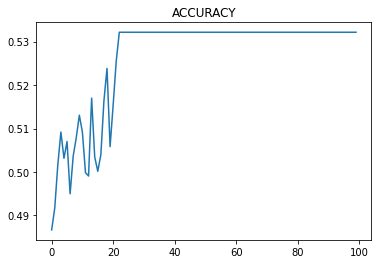

In [46]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

In [47]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity3.h5")

# Trial 4, keep 'is_successful'

In [48]:
#repeat with 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [49]:
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [50]:
type_count_df = application_df['APPLICATION_TYPE'].value_counts()

In [51]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count_df[type_count_df<250].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [52]:
classification_count_df = application_df['CLASSIFICATION'].value_counts()

In [53]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_count_df[classification_count_df < 1000].index)
# Replace in dataframe
for app in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [54]:
#drop features where nearly all rows are the same
application_df = application_df.drop(columns = ['STATUS'])

In [55]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [56]:
# Merge one-hot encoded features and drop the originals
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [59]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                3440      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [63]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 763us/step - loss: 108782.5781 - accuracy: 0.4954
Epoch 2/100
804/804 [==============================] - 1s 894us/step - loss: 28781.5312 - accuracy: 0.4949
Epoch 3/100
804/804 [==============================] - 1s 809us/step - loss: 29780.9883 - accuracy: 0.5051
Epoch 4/100
804/804 [==============================] - 1s 747us/step - loss: 82750.9922 - accuracy: 0.5143
Epoch 5/100
804/804 [==============================] - 1s 750us/step - loss: 31438.6523 - accuracy: 0.5060
Epoch 6/100
804/804 [==============================] - 1s 764us/step - loss: 9846.9863 - accuracy: 0.5106
Epoch 7/100
804/804 [==============================] - 1s 761us/step - loss: 9370.7881 - accuracy: 0.5184
Epoch 8/100
804/804 [==============================] - 1s 761us/step - loss: 28608.3340 - accuracy: 0.5301
Epoch 9/100
804/804 [==============================] - 1s 753us/step - loss: 3583.6365 - accuracy: 0.5182
Epoch 10/100
804/804 [=================

Epoch 79/100
804/804 [==============================] - 1s 818us/step - loss: 0.6913 - accuracy: 0.5321
Epoch 80/100
804/804 [==============================] - 1s 921us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 81/100
804/804 [==============================] - 1s 863us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 82/100
804/804 [==============================] - 1s 903us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 83/100
804/804 [==============================] - 1s 957us/step - loss: 0.6913 - accuracy: 0.5321
Epoch 84/100
804/804 [==============================] - 1s 970us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 85/100
804/804 [==============================] - 1s 839us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 86/100
804/804 [==============================] - 1s 804us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 87/100
804/804 [==============================] - 1s 826us/step - loss: 0.6912 - accuracy: 0.5321
Epoch 88/100
804/804 [==============================] - 1s 912us

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.4650 - accuracy: 0.6966
Loss: 2.46502423286438, Accuracy: 0.6965597867965698


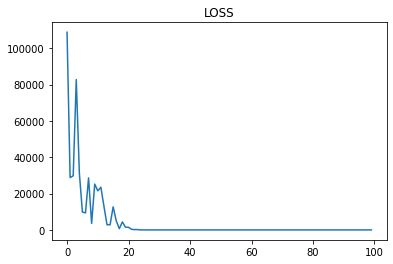

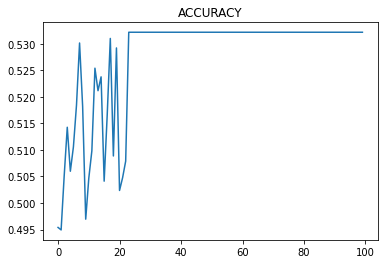

In [65]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

# Trial 4, keep 'is_successful' and 'status', increase neurons

In [66]:
#repeat with 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [67]:
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [68]:
type_count_df = application_df['APPLICATION_TYPE'].value_counts()

In [69]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count_df[type_count_df<250].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [70]:
classification_count_df = application_df['CLASSIFICATION'].value_counts()

In [71]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_count_df[classification_count_df < 1000].index)
# Replace in dataframe
for app in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [72]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [73]:
# Merge one-hot encoded features and drop the originals
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 80)                3440      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
nn.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [79]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [80]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 762us/step - loss: 1752.9817 - accuracy: 0.5212
Epoch 2/100
804/804 [==============================] - 1s 889us/step - loss: 0.6939 - accuracy: 0.5210
Epoch 3/100
804/804 [==============================] - 1s 895us/step - loss: 0.6941 - accuracy: 0.5182
Epoch 4/100
804/804 [==============================] - 1s 778us/step - loss: 0.6931 - accuracy: 0.5234
Epoch 5/100
804/804 [==============================] - 1s 785us/step - loss: 0.6943 - accuracy: 0.5195
Epoch 6/100
804/804 [==============================] - 1s 769us/step - loss: 0.6943 - accuracy: 0.5192
Epoch 7/100
804/804 [==============================] - 1s 767us/step - loss: 0.6950 - accuracy: 0.5196
Epoch 8/100
804/804 [==============================] - 1s 774us/step - loss: 0.6936 - accuracy: 0.5198
Epoch 9/100
804/804 [==============================] - 1s 762us/step - loss: 0.6931 - accuracy: 0.5265
Epoch 10/100
804/804 [==============================] - 1s 783us/step 

In [81]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 3.2602 - accuracy: 0.4673
Loss: 3.2602200508117676, Accuracy: 0.46728864312171936


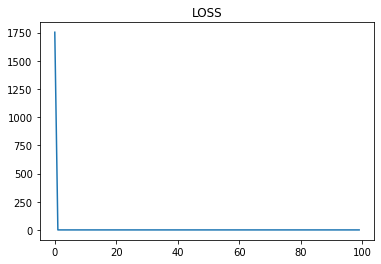

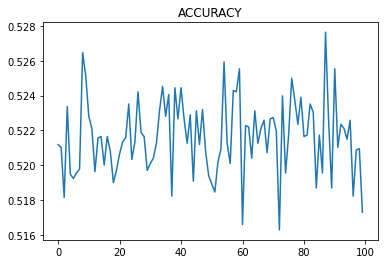

In [82]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

# Keep number of neurons, change to tanh

In [83]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 80)                3440      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [86]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 828us/step - loss: 0.6933 - accuracy: 0.5240
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5248
Epoch 3/100
804/804 [==============================] - 1s 890us/step - loss: 0.6918 - accuracy: 0.5306
Epoch 4/100
804/804 [==============================] - 1s 952us/step - loss: 0.6917 - accuracy: 0.5263
Epoch 5/100
804/804 [==============================] - 1s 905us/step - loss: 0.6918 - accuracy: 0.5311
Epoch 6/100
804/804 [==============================] - 1s 993us/step - loss: 0.6914 - accuracy: 0.5317
Epoch 7/100
804/804 [==============================] - 1s 937us/step - loss: 0.6917 - accuracy: 0.5285
Epoch 8/100
804/804 [==============================] - 1s 816us/step - loss: 0.6919 - accuracy: 0.5262
Epoch 9/100
804/804 [==============================] - 1s 884us/step - loss: 0.6918 - accuracy: 0.5325
Epoch 10/100
804/804 [==============================] - 1s 837us/step - los

In [91]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7015 - accuracy: 0.4981
Loss: 0.7014778256416321, Accuracy: 0.49807581305503845


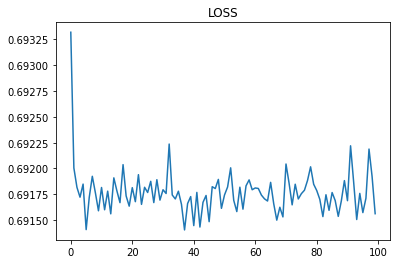

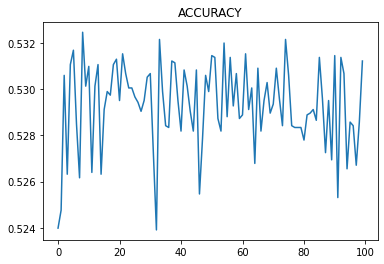

In [92]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()

# Keep number of neurons, add hidden layer

In [93]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  "A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs."
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 100

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Thirdhidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               4300      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 24,601
Trainable params: 24,601
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [95]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [96]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 963us/step - loss: 0.6946 - accuracy: 0.5199
Epoch 2/100
804/804 [==============================] - 1s 971us/step - loss: 0.6927 - accuracy: 0.5209
Epoch 3/100
804/804 [==============================] - 1s 948us/step - loss: 0.6927 - accuracy: 0.5254
Epoch 4/100
804/804 [==============================] - 1s 955us/step - loss: 0.6925 - accuracy: 0.5257
Epoch 5/100
804/804 [==============================] - 1s 967us/step - loss: 0.6924 - accuracy: 0.5262
Epoch 6/100
804/804 [==============================] - 1s 968us/step - loss: 0.6924 - accuracy: 0.5231
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5291: 0s - loss: 0.692
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5297
Epoch 9/100
804/804 [==============================] - 1s 955us/step - loss: 0.6923 - accuracy: 0.5264
Epoch 10/100
804/804 [==============================] - 1s 

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6909 - accuracy: 0.5332
Loss: 0.6909466981887817, Accuracy: 0.5331778526306152


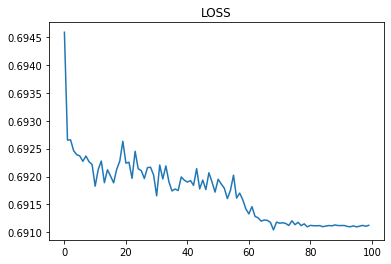

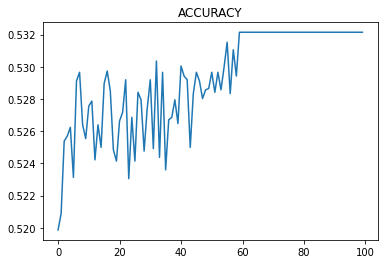

In [98]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['loss'])
# plt.plot(fit_model.history['val_loss'])
plt.title('LOSS')
plt.show()

plt.plot(fit_model.history['accuracy'])
plt.title('ACCURACY')
# plt.plot(fit_model.history['val_accuracy'])
plt.show()